<a href="https://colab.research.google.com/github/dudcoco/machine_deep_learning/blob/main/5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 5장 5-1
# 와인 분류_ 로지스틱 회귀
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info() # 데이터타입, 누락된 데이터 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe() # 열에 대한 통계룰 출력

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [11]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [12]:
# 와인 분류_ 결정 트리
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8569230769230769


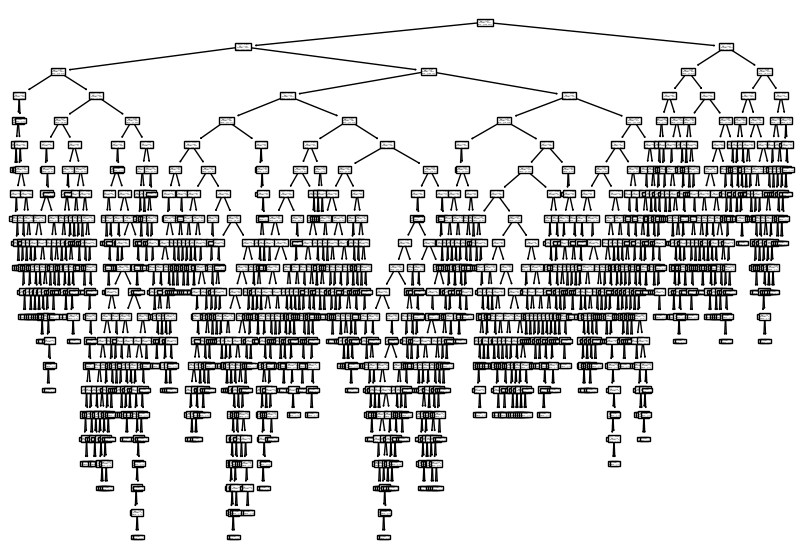

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

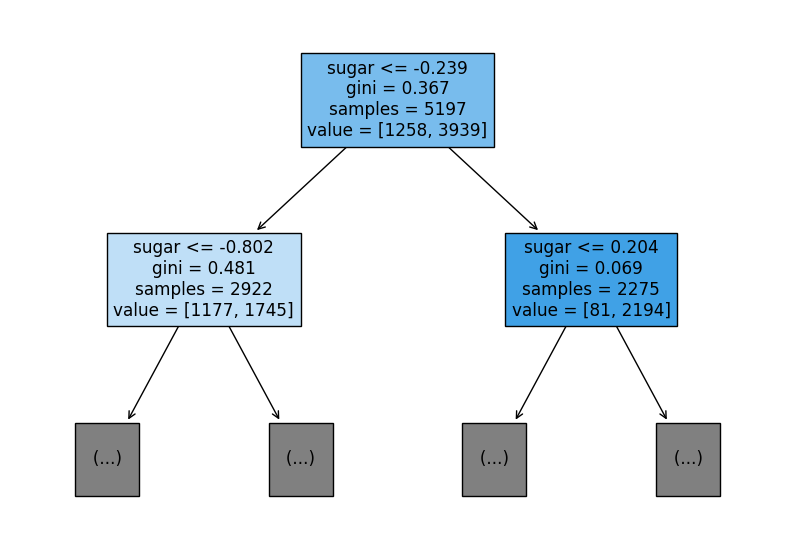

In [18]:
plt.figure(figsize=(10,7)) # figsize=(가로길이,세로길이) 그래프의 크기를 결정함
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # max_depth=1 : 루트노드 제외 1개 노드를 확장하여 그림
                                                                                  # filled=True : 클래스에 맞게 노드의 색 칠하기
plt.show()
# 왼쪽 yes 오른쪽 no
# 알코올 도수(alcohol), 당도 높을수록 화이트와인일 가능성 높음, pH 높을수록 레드와인일 가능성 높음

In [19]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


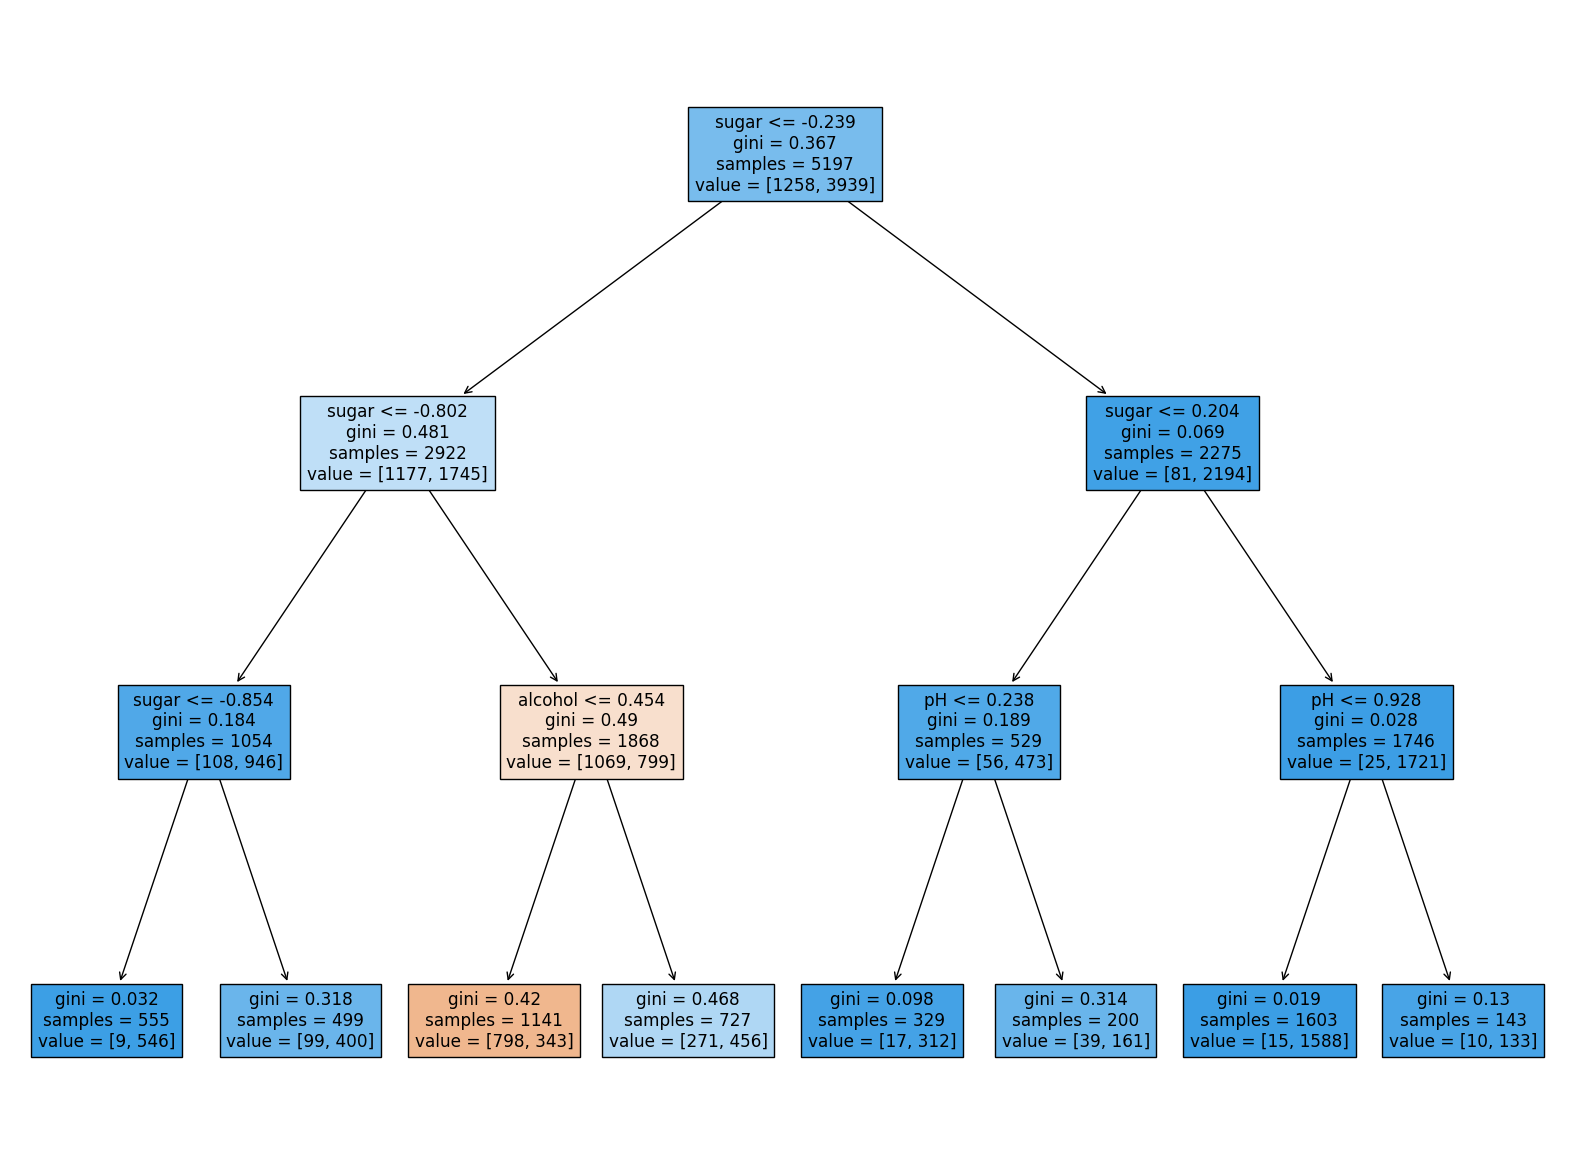

In [22]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [23]:
# 결정트리는 표준화 전처리를 할 필요가 없음. 기존의 데이터 가지고 분류가능
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
# 결과 : 점수가 전처리 데이터를 사용한 것과 동일하게 나옴. 즉,, 전처리가 필요없다는 것

0.8454877814123533
0.8415384615384616


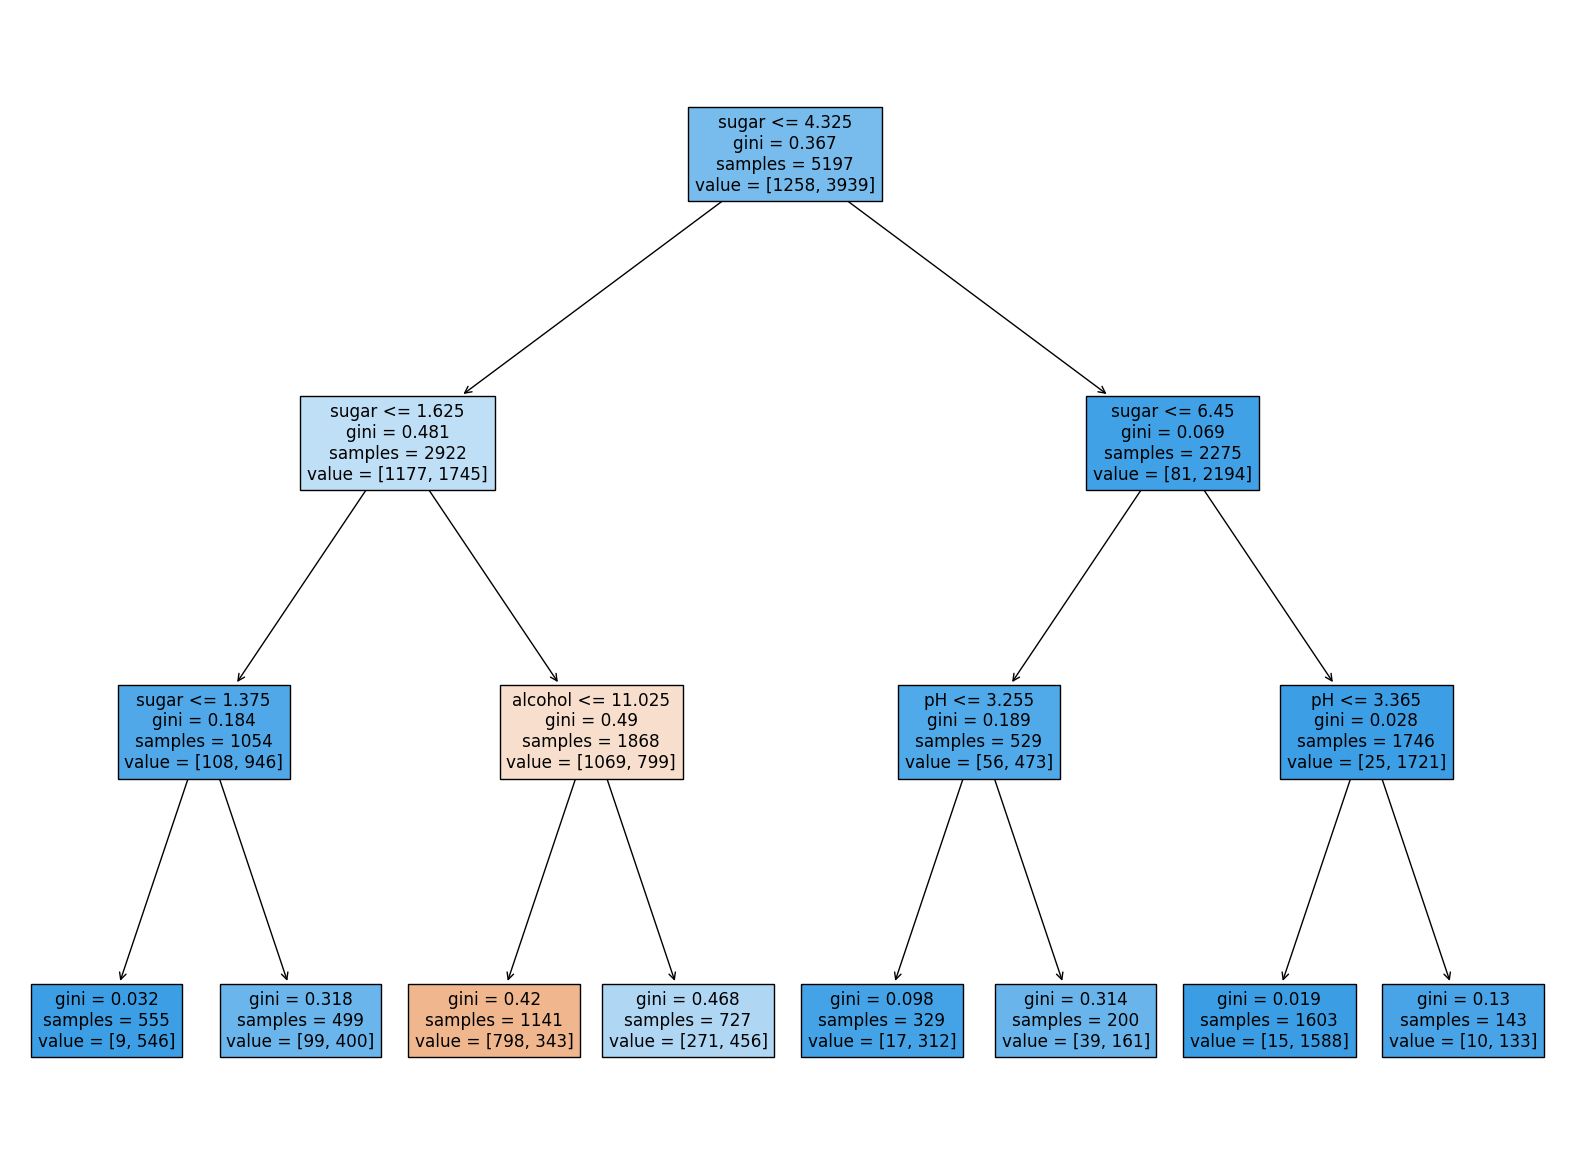

In [24]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()
# 결과 : 당도값이 전처럼 음수값이 나오지않음(표준점수가 아니기때문)
# 결과를 보면 당도가 1.625보다 크고 4.325보다 작은 와인 중에 알코올 도수가 11.025와 같거나 작은 것이 레드 와인임
# 그 외는 모두 화이트 와인

In [25]:
# 세 가지 속성(알코올, 당도, pH) 중 가장 중요한 속성 알아내기
print(dt.feature_importances_)
# 결과 : 두번째 속성(당도)이 86으로 가장 중요한 속성임을 알 수 있음

[0.12345626 0.86862934 0.0079144 ]


In [27]:
# 5-2장, 교차검증과 그리드 서치
# 훈련 세트, 검증 세트, 테스트 세트로 나누기
# 검증 세트로 검증하고 테스트 세트는 마지막에 한 번만 사용해서 실제 투입 시 점수와 비슷한 성능 기대해볼수 있을 것임
import pandas as pd
pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [29]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)
print(train_input.shape, train_target.shape)
# train_input과 train_target을 다시 train_test_split() 함수에 넣어서 새로운 훈련세트, 검증세트를 만듦. test_size-0.2로 지정해서 훈련세트의 20%를 val_input으로 만듦
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)
print(sub_input.shape, val_input.shape)
# 결과 : 원래 5197개였던 훈련세트가 4157개로 줄고, 검증세트는 1040개가 됨

(5197, 3) (5197,)
(4157, 3) (1040, 3)


In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [32]:
# 교차 검증. ㅏ-폴드 교차검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)
# 결과 : fit_time, score_time, test_score 키를 가진 딕셔너리 반환
# fit_time, score_time : 모델 훈련 시간, 검증 시간
# test_score : 5개의 검증 폴드 점수

{'fit_time': array([0.01053333, 0.00980401, 0.01021385, 0.01009893, 0.00982547]), 'score_time': array([0.00208163, 0.00200939, 0.00206017, 0.0019908 , 0.0019784 ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [33]:
# 교차 검증의 최종 점수 : test_score의 값을 평균내면 됨
import numpy as np
print(np.mean(scores['test_score']))


0.855300214703487


In [36]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [37]:
# 10-폴드 교차검증
spliter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # n_splits 매개변수 : 몇번의 교차검증을 수행할것인지 횟수 설정하는 것
scores = cross_validate(dt, train_input, train_target, cv=spliter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [39]:
# 그리드 서치
# 사이킷런 GridSearchCV 클래스 : 하이퍼파라미터 탐색과 교차검증 한번에 수행
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

# 그리드 서치 객체 만들기
# GridSearchCV 클래스에 텀색 대상 모델과 params 변수를 전달하여 그리드 서치 객체 생성
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [40]:
# GridSearchCV의 cv 매개변수 기본값은 5임 => min_impurity_decrease 값마다 5-폴드 교차검증을 기본적으로 수행함 => 5*5=25개의 모델을 훈련하는 것임
# n_jobs : 모델을 훈련할 코어의 개수 지정. -1로 지정 시 모든 코어를 사용함. 기본값은 1

In [41]:
gs.fit(train_input, train_target)
dt = gs.best_estimator_ # best_estimator_ : 25개의 모델 중에서 가장 훈련 점수가 높은 모델의 매개변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델 훈련

print(dt.score(train_input, train_target))

0.9615162593804117


In [42]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [43]:
# 5번의 교차검증으로 얻은 점수 출력하기(수동)
print(gs.cv_results_['mean_test_score'])
# 결과 : 첫번째 값이 가장 높은 점수

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [44]:
# 자동으로 가장 높은 점수 출력하기 -> 넘파이의 argmax() 함수 이용
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [48]:
params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001), # arange 함수에서는 0.0001부터 0.001까지 0.0001만큼 증가시켜 값을 만듦
          'max_depth' : range(5, 20, 1), # range 함수에서는 정수만 사용 가능. 5부터 20까지 1만큼 증가시켜 값을 만듦
          'min_samples_split' : range(2, 100, 10)}

In [49]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [51]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [52]:
# 랜덤 서치
from scipy.stats import uniform, randint # randint: 정수값 뽑기, uniform: 실수값 뽑기
rgen = randint(0, 10)
rgen.rvs(10)

array([2, 8, 6, 2, 1, 9, 6, 6, 7, 5])

In [53]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([110, 103, 107,  97, 105,  98,  84, 107,  85, 104]))

In [54]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.20355389, 0.02824026, 0.27460164, 0.91449505, 0.36567545,
       0.75197862, 0.05146108, 0.36914571, 0.58476625, 0.87162981])

In [65]:
# 탐색할 매개변수 범위 정하기
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
          'max_depth' : randint(20, 50),
          'min_samples_split' : randint(2, 25),
          'min_samples_leaf' : randint(1, 25),}
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)
# 최적의 매개변수 조합
print(gs.best_params_)
# 최고의 교차검증 횟수
print(np.max(gs.cv_results_['mean_test_score']))

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}
0.8695428296438884


In [66]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


In [68]:
# 5-3 트리의 앙상블
# 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘 -> 앙상블 학습!!
# 1_랜덤 포레스트 : 앙상블 학습의 대표 중 하나
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [69]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [71]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_) # OOB 점수. OOB 샘플은 검증 세트의 역할을 함. 자체적으로 모델을 평가...? 어렵다

0.8934000384837406


In [73]:
# 2_엑스트라 트리 : 기본적으로 100개의 결정트리를 훈련함. 전체 특성 중 일부 특성을 랜덤 선택하여 노드 분할. 부트스트랩 샘플 사용하지 않음
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [75]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [76]:
# 3_그레디언트 부스팅 : 길이가 얕은 결정트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블하는 방법
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [78]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [79]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [80]:
# 4_히스토그램 기반 그레디언트 부스팅 : 가장 인기 높음. 입력 특성을 256개 구간으로 나누고, 이중 하나를 뗴어놓고 누락된 값을 위해 사용함
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgh = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgh, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9321723946453317 0.8801241948619236


In [81]:
from sklearn.inspection import permutation_importance

hgh.fit(train_input, train_target)
result = permutation_importance(hgh, train_input, train_target,
                                n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [82]:
result = permutation_importance(hgh, test_input, test_target,
                                n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [83]:
hgh.score(test_input, test_target)

0.8723076923076923

In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


In [87]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
